In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud
from sklearn.feature_extraction import text

from mpl_toolkits.mplot3d import Axes3D

In [34]:
blog_data=pd.read_csv("blogtext.csv")

In [35]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
641006,3103955,male,17,Government,Virgo,2004-04-07,"In a bad mood today,dont know why,s..."
576880,3361437,male,26,Technology,Aries,2004-06-16,Cabir is a network worm (http://w...
356897,1401402,female,23,Student,Capricorn,2004-07-06,I woke up screaming Nooooo.... The wor...
333944,4124898,male,43,Construction,Cancer,2005-08-10,"Hello Everyone, Well we're back from th..."
299138,3982217,male,25,indUnk,Taurus,2004-08-06,Just ting up a few loose ends like look...
624666,1112886,female,15,Student,Capricorn,2003-03-01,whooo! our basketball game wa...
486180,4124603,female,14,indUnk,Sagittarius,2004-08-11,Yahoo! finally found my a maths textbk....
477443,3051630,female,26,Religion,Aries,2004-08-02,"So-Ho! Welp, London is so fun. It'..."
317464,4254419,male,26,Communications-Media,Capricorn,2004-08-22,i'm not too sure what to use this 'blog...
192362,671748,male,27,Communications-Media,Aries,2003-02-22,"Today in 1980, the Miracle o..."


In [36]:
# ####################################################################################################
# #####                            Sampling for code develpoment 
# #####                            Remove after validating code
# ####################################################################################################

blog_data=blog_data.sample(frac=.05)#.02

print("******WARNING****** \n DATASET SAMPLED!!!!!!")
print(blog_data.shape)

******WARNING****** 
 DATASET SAMPLED!!!!!!
(30583, 7)


In [37]:
adit_stpwrds=["urllink","nbsp","ve","ll"]
stp_wrds = text.ENGLISH_STOP_WORDS.union(adit_stpwrds)

# Word Frequencies
tomar las 1100 más frecuentes y eliminar las 100 primeras

In [48]:
count_vect = CountVectorizer(max_features=1150)#,stop_words=stp_wrds)#,ngram_range=(1,2))
n_grams_counts = count_vect.fit_transform(blog_data["text"])#.toarray()
n_grams_counts.shape
#count_vect.get_feature_names()

(30583, 1150)

In [49]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_counts,markersize=.5, marker="o",aspect='auto')
# plt.title("Word Frequencies")

txt_info= n_grams_counts.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =count_vect.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices[:top_n]])
pd.DataFrame({"word":top_features[:,0],"info":top_features[:,1]})[100:150]

,info,word
100,8607.0,life
101,8510.0,last
102,8508.0,into
103,8267.0,still
104,8117.0,did
105,8077.0,say
106,8029.0,things
107,7954.0,new
108,7946.0,work
109,7946.0,could


Text(0.5, 1.0, 'Term info sorted')

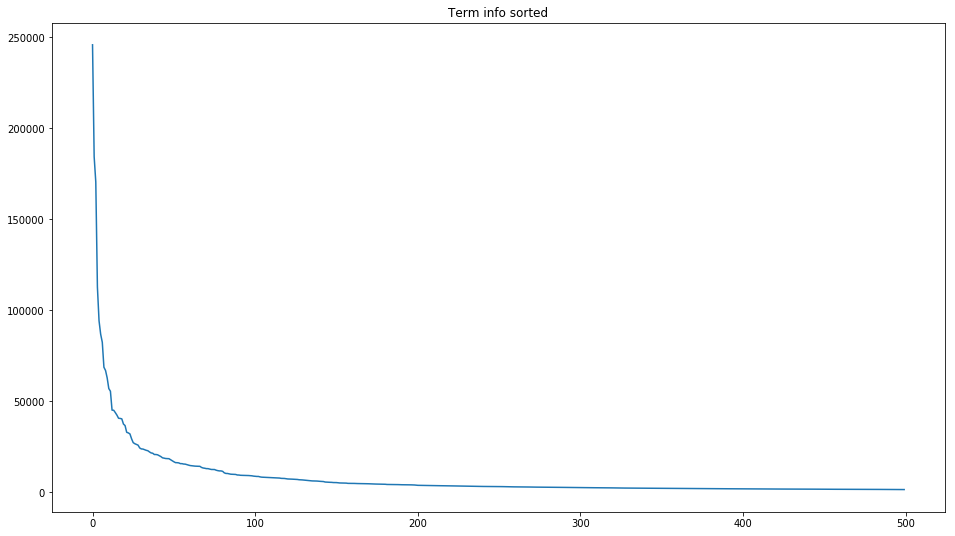

In [50]:
top_n=500

plt.figure(figsize=(16,9))
plt.plot(txt_info[indices[:top_n]])
plt.title("Term info sorted")

# Word Embeddings

In [ ]:
# tfidf_transformer = TfidfVectorizer(stop_words=stp_wrds,max_features=1000 )
# n_grams_tfidf = tfidf_transformer.fit_transform(blog_data["text"])
# n_grams_tfidf.shape

In [ ]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_tfidf,markersize=.5, marker="o",aspect='auto')
# plt.title("TF-IDF matrix")

In [ ]:
# top_n=150
# txt_info= n_grams_tfidf.toarray().sum(axis=0)
# indices = np.argsort(txt_info)[::-1]
# features =tfidf_transformer.get_feature_names()
# top_features = np.array([[features[i],float(txt_info[i])] for i in indices[:top_n]])
# pd.DataFrame({"word":top_features[:,0],"info":top_features[:,1]})[:50]

In [ ]:
# plt.figure(figsize=(16,9))
# plt.plot(txt_info[indices])#[indices[:top_n]]
# plt.title("Term info sorted")

In [ ]:
# n_grams_count_top=n_grams_tfidf.toarray()[:,indices[:top_n]]

In [ ]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_count_top,markersize=.5,aspect='auto', marker="o")
# plt.title("Top term info matrix")

In [ ]:
# text_ward_full=hierarchy.linkage(n_grams_count_top, 'ward')#(n_grams_tfidf.toarray(),"ward")#
# text_ward_full=hierarchy.linkage(n_grams_tfidf.toarray(),"ward")

In [ ]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(text_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram from top embedding')
# plt.show()

In [ ]:
df_out=pd.DataFrame(blog_data["id"]).join(pd.SparseDataFrame(n_grams_tfidf,
                                         columns=tfidf_transformer.get_feature_names(),
                                         index=list(blog_data.index)))#.to_csv("tfidf_pd_texts.csv")

In [ ]:
usr_txt_ftr=df_out.groupby(['id'], sort=False).sum()
usr_txt_ftr.to_csv("usr_txt_ftr.csv")

In [ ]:
# (usr_txt_ftr/max(usr_txt_ftr.max())).to_csv("usr_txt_ftr.csv")
usr_txt_ftr.to_csv("usr_txt_ftr.csv")